# import Libraries


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

# Read the .csv file.

In [148]:
df=pd.read_csv('weather-sa-2017-2019-clean.csv')
df.head()

,index,region,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1-Jan-17,0:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1-Jan-17,1:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1-Jan-17,3:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1-Jan-17,4:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1-Jan-17,5:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [149]:
df=df.sort_values('region')
df

,index,region,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
135313,135313,Assir,1-Jan-17,0:00,2017,1,1,24,0,Clear,12,7,100%,1026.0,16
144299,144299,Assir,20-Oct-18,18:00,2018,10,20,18,0,Passing clouds,17,0,83%,1025.0,-1
144300,144300,Assir,20-Oct-18,19:00,2018,10,20,19,0,Passing clouds,17,0,83%,1025.0,-1
144301,144301,Assir,20-Oct-18,20:00,2018,10,20,20,0,Passing clouds,17,9,73%,1026.0,-1
144302,144302,Assir,20-Oct-18,21:00,2018,10,20,21,0,Passing clouds,17,7,83%,1027.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121816,121816,Tabuk,10-Oct-17,13:00,2017,10,10,13,0,Sunny,27,13,34%,1016.0,16
121815,121815,Tabuk,10-Oct-17,12:00,2017,10,10,12,0,Sunny,26,11,42%,1017.0,16
121814,121814,Tabuk,10-Oct-17,11:00,2017,10,10,11,0,Sunny,25,11,44%,1017.0,16
121821,121821,Tabuk,10-Oct-17,18:00,2017,10,10,18,0,Sunny,28,19,28%,1014.0,16


In [150]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 135313 to 124511
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       249023 non-null  int64  
 1   region      249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 30.4+ MB


In [151]:
df.shape

(249023, 15)

# Convert date from object type to datetime

In [152]:
df['date'] = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 135313 to 124511
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       249023 non-null  int64         
 1   region      249023 non-null  object        
 2   date        249023 non-null  datetime64[ns]
 3   time        249023 non-null  object        
 4   year        249023 non-null  int64         
 5   month       249023 non-null  int64         
 6   day         249023 non-null  int64         
 7   hour        249023 non-null  int64         
 8   minute      249023 non-null  int64         
 9   weather     249023 non-null  object        
 10  temp        249023 non-null  int64         
 11  wind        249023 non-null  int64         
 12  humidity    249006 non-null  object        
 13  barometer   248951 non-null  float64       
 14  visibility  249023 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), ob

In [153]:
df.describe()

,index,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


# Convert humidity from string type to float

In [ ]:
df['humidity'] = df['humidity'].str.rstrip('%').astype('float') 
df.head()

# Extracr new feture named 'sunny'

In [155]:
def get_sunny(weather):
    if 'Sunny'  in weather:
        return 100
    return 0
df['sunny'] = df.weather.map(get_sunny)

# Drop unnecessary coluomns

In [156]:
to_drop = ['index','barometer','visibility','minute','weather']
df.drop(to_drop, inplace=True, axis=1)
df.head()


,region,date,time,year,month,day,hour,temp,wind,humidity,sunny
135313,Assir,2017-01-01,0:00,2017,1,1,24,12,7,100.0,0
144299,Assir,2018-10-20,18:00,2018,10,20,18,17,0,83.0,0
144300,Assir,2018-10-20,19:00,2018,10,20,19,17,0,83.0,0
144301,Assir,2018-10-20,20:00,2018,10,20,20,17,9,73.0,0
144302,Assir,2018-10-20,21:00,2018,10,20,21,17,7,83.0,0


In [157]:
df[df.duplicated()]

,region,date,time,year,month,day,hour,temp,wind,humidity,sunny


In [158]:
df.region.str.replace(',', '')

135313    Assir
144299    Assir
144300    Assir
144301    Assir
144302    Assir
          ...  
121816    Tabuk
121815    Tabuk
121814    Tabuk
121821    Tabuk
124511    Tabuk
Name: region, Length: 249023, dtype: object

In [159]:

df['region'].replace({'EP':'ER',"Jawf":"Aljawf"} ,inplace=True)
df.region = df.region.str.replace('Northern boarder','NB')


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 135313 to 124511
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   region    249023 non-null  object        
 1   date      249023 non-null  datetime64[ns]
 2   time      249023 non-null  object        
 3   year      249023 non-null  int64         
 4   month     249023 non-null  int64         
 5   day       249023 non-null  int64         
 6   hour      249023 non-null  int64         
 7   temp      249023 non-null  int64         
 8   wind      249023 non-null  int64         
 9   humidity  249006 non-null  float64       
 10  sunny     249023 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 22.8+ MB


# Check and fill nan values and outliers

In [161]:
df.isna().sum()

region       0
date         0
time         0
year         0
month        0
day          0
hour         0
temp         0
wind         0
humidity    17
sunny        0
dtype: int64

In [162]:
df.describe()

,year,month,day,hour,temp,wind,humidity,sunny
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249006.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,24.722624,12.957104,37.553139,33.006590
std,0.706113,3.521591,8.787958,6.910254,8.880913,8.711619,23.593068,47.023748
min,2017.000000,1.000000,1.000000,1.000000,-4.000000,-1.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,7.000000,18.000000,7.000000,17.000000,0.000000
50%,2018.000000,6.000000,16.000000,13.000000,24.000000,11.000000,32.000000,0.000000
75%,2018.000000,9.000000,23.000000,19.000000,31.000000,19.000000,55.000000,100.000000
max,2019.000000,12.000000,31.000000,24.000000,50.000000,163.000000,100.000000,100.000000


In [163]:
df.wind[df.wind <0] = None;

<ipython-input-163-cc266ee70586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.wind[df.wind <0] = None;


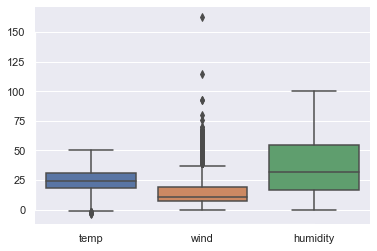

In [164]:
df_box=df[['temp','wind','humidity']]
sns.boxplot(data=df_box)
sns.despine(offset=0, trim=True)

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


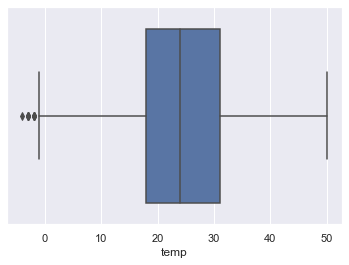

In [165]:
sns.boxplot(df['temp']);

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


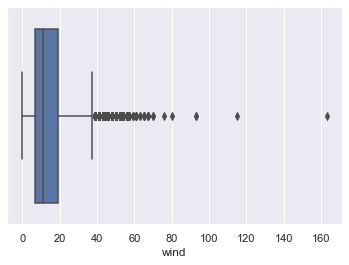

In [166]:
sns.boxplot(df['wind']);

In [167]:
df.wind[df.wind >70]=None;

<ipython-input-167-55a074a8f235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.wind[df.wind >70]=None;


In [168]:
df.isna().sum()

region        0
date          0
time          0
year          0
month         0
day           0
hour          0
temp          0
wind        115
humidity     17
sunny         0
dtype: int64

In [169]:
df[df.isna().any(axis=1)]

,region,date,time,year,month,day,hour,temp,wind,humidity,sunny
147437,Assir,2019-03-03,14:00,2019,3,3,14,24,NaN,25.0,100
141864,Assir,2017-10-07,20:00,2017,10,7,20,23,NaN,19.0,0
139444,Assir,2017-06-26,19:00,2017,6,26,19,28,NaN,12.0,0
218588,Baha,2018-02-24,9:00,2018,2,24,9,20,NaN,56.0,100
214518,Baha,2017-09-04,7:00,2017,9,4,7,24,NaN,25.0,100
...,...,...,...,...,...,...,...,...,...,...,...
131821,Tabuk,2018-12-05,5:00,2018,12,5,5,12,NaN,58.0,0
124812,Tabuk,2018-02-13,14:00,2018,2,13,14,18,30.0,NaN,0
121096,Tabuk,2017-09-10,11:00,2017,9,10,11,35,NaN,25.0,0
120239,Tabuk,2017-08-05,8:00,2017,8,5,8,27,NaN,39.0,100


In [170]:
df=df.interpolate(method='linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249023 entries, 135313 to 124511
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   region    249023 non-null  object        
 1   date      249023 non-null  datetime64[ns]
 2   time      249023 non-null  object        
 3   year      249023 non-null  int64         
 4   month     249023 non-null  int64         
 5   day       249023 non-null  int64         
 6   hour      249023 non-null  int64         
 7   temp      249023 non-null  int64         
 8   wind      249023 non-null  float64       
 9   humidity  249023 non-null  float64       
 10  sunny     249023 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 22.8+ MB


In [171]:
df.isna().sum()

region      0
date        0
time        0
year        0
month       0
day         0
hour        0
temp        0
wind        0
humidity    0
sunny       0
dtype: int64

C:\Users\WELCOME\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


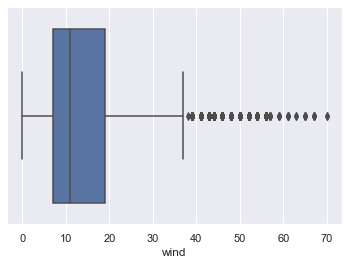

In [172]:
sns.boxplot(df['wind']);

# Calculate average

In [173]:
df1 = df.loc[(df.index) , ['region','sunny','wind','temp','humidity','day']]
avrg = df1.groupby(by = ['region']).mean()
#avrg.reset_index(level=0, inplace=True)
avrg

,sunny,wind,temp,humidity,day
region,,,,,
Aljawf,37.278892,13.853331,23.101268,30.499926,15.681456
Assir,26.972123,12.350942,20.257414,47.590154,15.708185
Baha,27.852097,14.591037,23.468110,38.722982,15.685355
ER,36.595515,14.850554,27.215077,45.095488,15.714888
Hail,34.491327,12.876696,25.927837,41.532826,15.680831
Jazan,26.733572,12.374704,20.711735,45.803066,15.681426
Madina,37.700977,11.793038,28.708740,19.971600,15.684798
Mecca,32.188672,13.909883,29.023239,54.158772,15.681419
NB,40.004942,13.601285,24.978799,26.264344,15.694490


In [174]:
df2 = df.loc[(df['year'] == 2017) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M17 = df2.groupby(by = ['region','month']).mean()
avrg_M17.reset_index(level=0,inplace=True)
avrg_M17

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,29.019074,10.538147,42.277929,12.633515,16.038147,2017.0
2,Aljawf,37.462687,10.435821,27.670896,14.570149,14.482090,2017.0
3,Aljawf,34.214003,17.721268,37.919419,18.578600,15.826948,2017.0
4,Aljawf,32.653061,23.209524,25.767347,16.746939,15.538776,2017.0
5,Aljawf,49.597855,29.463807,15.453083,15.614611,15.957105,2017.0
...,...,...,...,...,...,...,...
8,Tabuk,37.313433,34.401628,19.185889,12.442334,15.925373,2017.0
9,Tabuk,34.685315,30.885315,21.503497,10.965734,15.525874,2017.0
10,Tabuk,46.081081,23.885135,28.681081,9.924324,15.989189,2017.0


In [175]:
df3 = df.loc[(df['year'] == 2018) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M18 = df3.groupby(by = ['region','month']).mean()
avrg_M18.reset_index(level=0,inplace=True)
avrg_M18

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,25.845737,10.880920,48.304465,14.472260,15.788904,2018.0
2,Aljawf,24.850299,15.976048,38.474551,14.230539,14.640719,2018.0
3,Aljawf,37.983425,22.069061,23.527624,14.812155,16.110497,2018.0
4,Aljawf,33.333333,23.266949,26.853107,16.573446,15.555085,2018.0
5,Aljawf,34.718499,28.683646,21.242627,17.757373,15.765416,2018.0
...,...,...,...,...,...,...,...
8,Tabuk,51.282051,32.175439,22.993252,12.900135,16.006748,2018.0
9,Tabuk,27.538248,32.070932,20.866481,11.532684,15.546592,2018.0
10,Tabuk,29.704301,25.326613,31.458333,12.767473,16.045699,2018.0


In [176]:
df4 = df.loc[(df['year'] == 2019) , ['region','sunny','temp','humidity','wind','day','month','year']]
avrg_M19 = df4.groupby(by = ['region','month']).mean()
avrg_M19.reset_index(level=0,inplace=True)
avrg_M19

,region,sunny,temp,humidity,wind,day,year
month,,,,,,,
1,Aljawf,23.505976,11.759628,50.795485,13.475432,16.131474,2019.0
2,Aljawf,26.002972,12.939079,55.610698,9.644874,14.405646,2019.0
3,Aljawf,33.055556,15.548611,38.075000,15.838889,16.006944,2019.0
4,Aljawf,37.765205,20.625177,29.540311,12.766620,15.554455,2019.0
1,Assir,42.019100,17.125512,51.613915,10.922237,15.948158,2019.0
2,Assir,25.722983,17.484018,58.039574,15.611872,14.407915,2019.0
3,Assir,28.412256,18.732591,53.750696,19.901114,16.089136,2019.0
4,Assir,20.084866,21.107496,52.875530,15.360679,15.524752,2019.0
1,Baha,29.614325,18.687328,50.820937,12.545455,16.085399,2019.0


In [208]:
avrg['sunny'].nlargest(14)

region
NB        40.004942
Madina    37.700977
Aljawf    37.278892
ER        36.595515
Tabuk     34.649209
Qassim    34.628404
Hail      34.491327
Mecca     32.188672
Riyadh    30.899458
Baha      27.852097
Assir     26.972123
Najran    26.754673
Jazan     26.733572
Name: sunny, dtype: float64

In [209]:
avrg['wind'].nlargest(14)

region
ER        14.850554
Baha      14.591037
Mecca     13.909883
Aljawf    13.853331
NB        13.601285
Hail      12.876696
Qassim    12.863967
Najran    12.393888
Jazan     12.374704
Assir     12.350942
Tabuk     11.951408
Madina    11.793038
Riyadh    10.570915
Name: wind, dtype: float64

In [210]:
avrg['temp'].nsmallest(14)

region
Assir     20.257414
Najran    20.692951
Jazan     20.711735
Tabuk     22.638735
Aljawf    23.101268
Baha      23.468110
NB        24.978799
Hail      25.927837
Qassim    25.961350
ER        27.215077
Riyadh    27.957981
Madina    28.708740
Mecca     29.023239
Name: temp, dtype: float64

In [211]:
avrg['humidity'].nsmallest(14)

region
Madina    19.971600
Riyadh    24.087936
NB        26.264344
Tabuk     28.718355
Aljawf    30.499926
Baha      38.722982
Qassim    41.476204
Hail      41.532826
ER        45.095488
Jazan     45.803066
Najran    45.953645
Assir     47.590154
Mecca     54.158772
Name: humidity, dtype: float64

In [181]:
avrg_SW=avrg.loc[(avrg.index),['sunny','wind']]
avrg_SW

,sunny,wind
region,,
Aljawf,37.278892,13.853331
Assir,26.972123,12.350942
Baha,27.852097,14.591037
ER,36.595515,14.850554
Hail,34.491327,12.876696
Jazan,26.733572,12.374704
Madina,37.700977,11.793038
Mecca,32.188672,13.909883
NB,40.004942,13.601285


# Data Visualization

<AxesSubplot:xlabel='humidity', ylabel='region'>

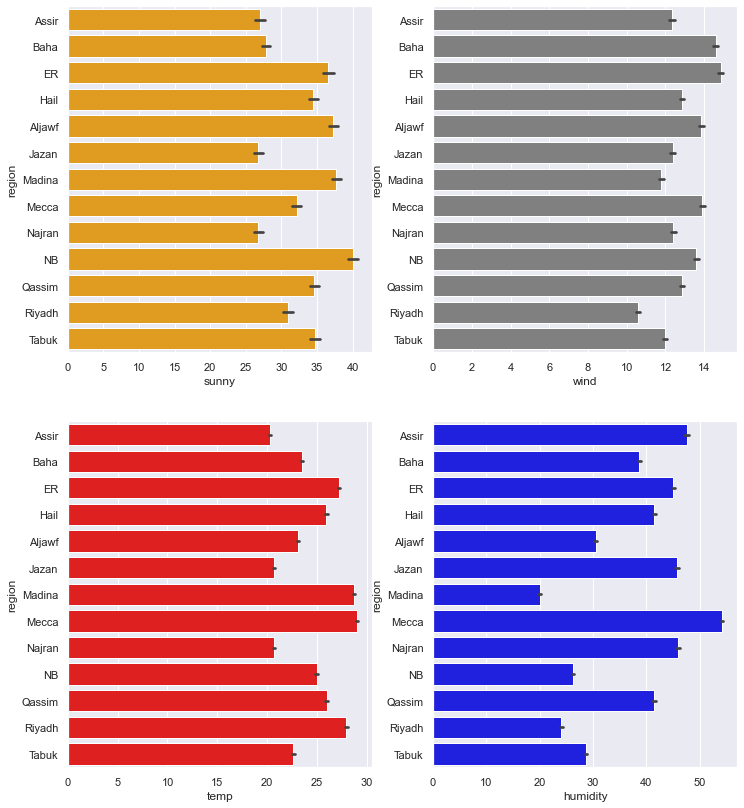

In [215]:

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 14)

sns.barplot(data= df, y = df.region, x = df.sunny , ax =ax[0,0], color="orange")
sns.barplot(data= df, y = df.region, x = df.wind , ax =ax[0,1], color="gray")
sns.barplot(data= df, y = df.region, x = df.temp , ax =ax[1,0], color="red")
sns.barplot(data= df, y = df.region, x = df.humidity , ax =ax[1,1], color="blue")


Text(0.5, 1.0, '2019')

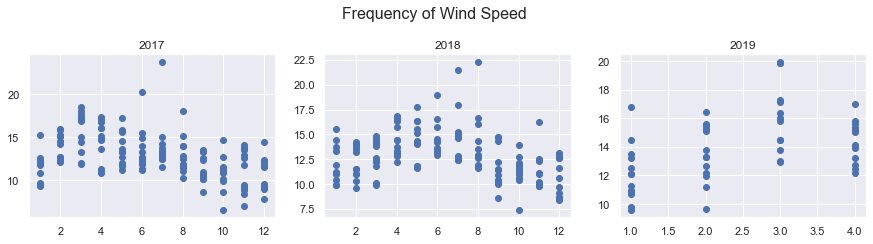

In [200]:
plt.figure(figsize=[15,3])



plt.suptitle('Frequency of Wind Speed',fontsize = 16,y=1.1)


plt.subplot(1,3,1)
plt.scatter(avrg_M17.index,avrg_M17.wind)
plt.title('2017')


plt.subplot(1,3,2)
plt.scatter(avrg_M18.index,avrg_M18.wind)
plt.title('2018')

plt.subplot(1,3,3)
plt.scatter(avrg_M19.index,avrg_M19.wind)
plt.title('2019')


Text(0.5, 1.0, '2019')

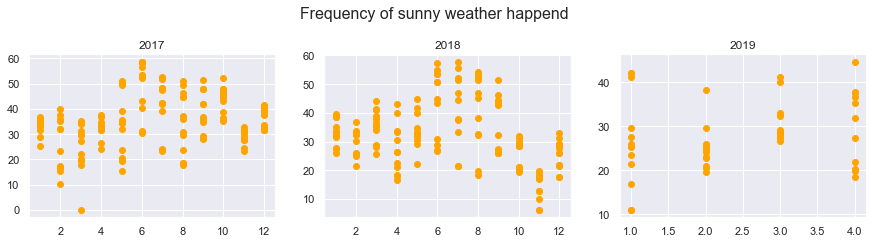

In [213]:
plt.figure(figsize=[15,3])



plt.suptitle('Frequency of sunny weather happend',fontsize = 16,y=1.1)


plt.subplot(1,3,1)
plt.scatter(avrg_M17.index,avrg_M17.sunny,color='orange')
plt.title('2017')


plt.subplot(1,3,2)
plt.scatter(avrg_M18.index,avrg_M18.sunny,color='orange')
plt.title('2018')

plt.subplot(1,3,3)
plt.scatter(avrg_M19.index,avrg_M19.sunny,color='orange')
plt.title('2019')
